In [ ]:
pip install pandas scikit-learn matplotlib seaborn

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score


In [21]:
df = pd.read_csv("/content/heart.csv")  # Replace 'heart.csv' with your actual file name
print(df)
# uploaded = files.upload()
# df = pd.read_csv("heart.csv")  # Replace 'heart.csv' with your actual file name
# print(df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

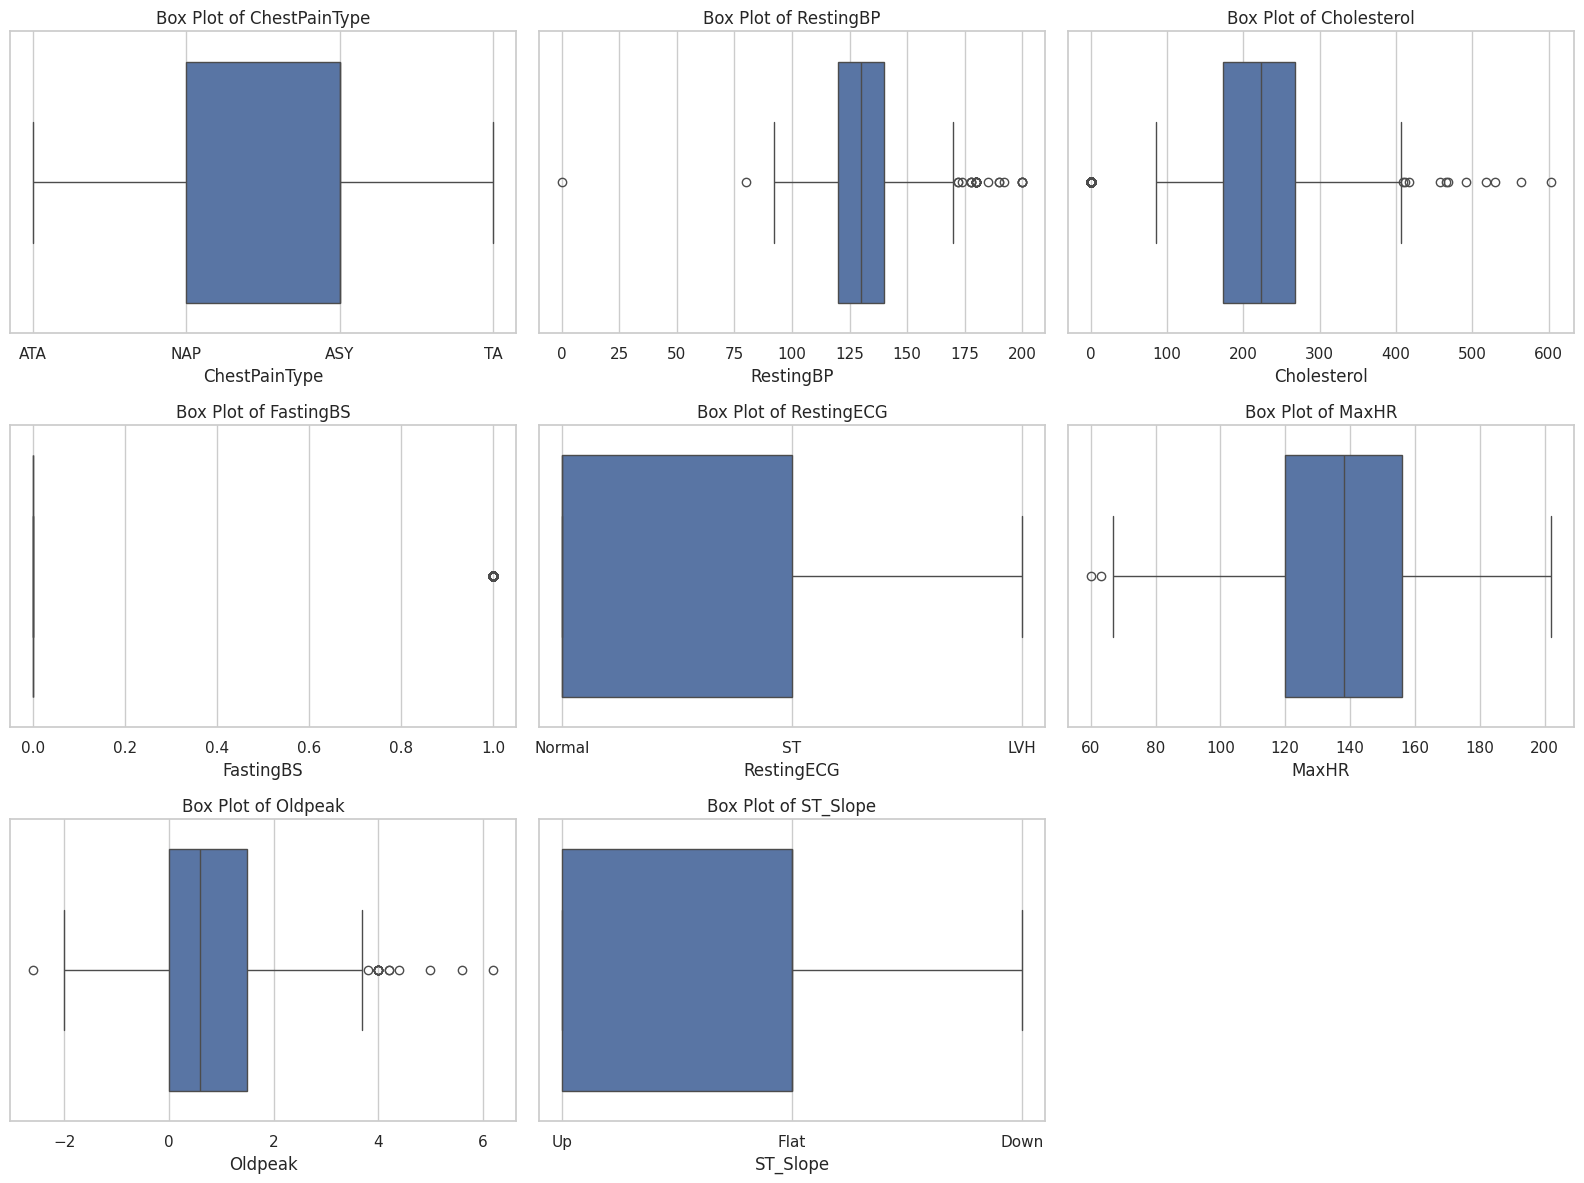

Outliers in RestingBP:
     RestingBP
109        190
123        180
189        180
190        180
241        200
274        180
275        180
278        180
314         80
365        200
372        185
399        200
411        180
423        180
449          0
475        178
550        172
585        180
592        190
673        174
702        178
725        180
732        200
759        192
774        178
780        180
855        180
880        172


Outliers in Cholesterol:
     Cholesterol
28           468
30           518
69           412
76           529
103          466
..           ...
535            0
536            0
616          564
667          417
796          409

[183 rows x 1 columns]


Outliers in FastingBS:
     FastingBS
36           1
38           1
52           1
84           1
86           1
..         ...
887          1
888          1
901          1
911          1
914          1

[214 rows x 1 columns]


Outliers in MaxHR:
     MaxHR
370     63
390     60


Ou

<ipython-input-22-65cb38448fc1>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Sex.replace({'F': 0, 'M': 1}, inplace=True)
<ipython-input-22-65cb38448fc1>:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Sex.replace({'F': 0, 'M': 1}, inplace=True)
<ipython-input-22-65cb38448fc1>:49: Future

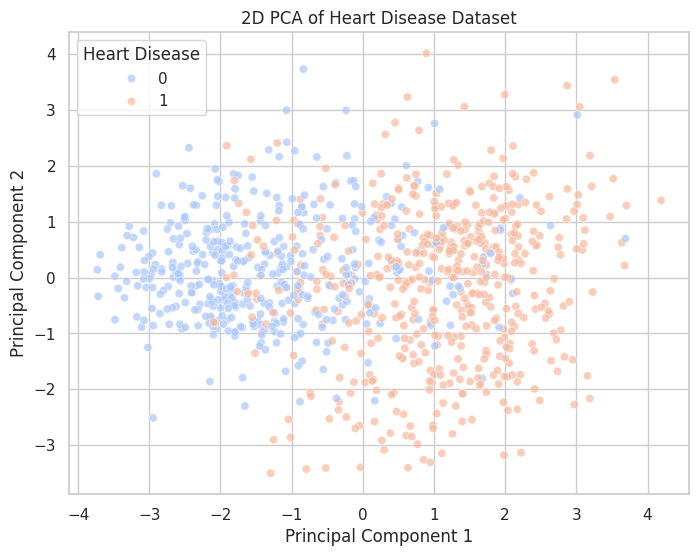

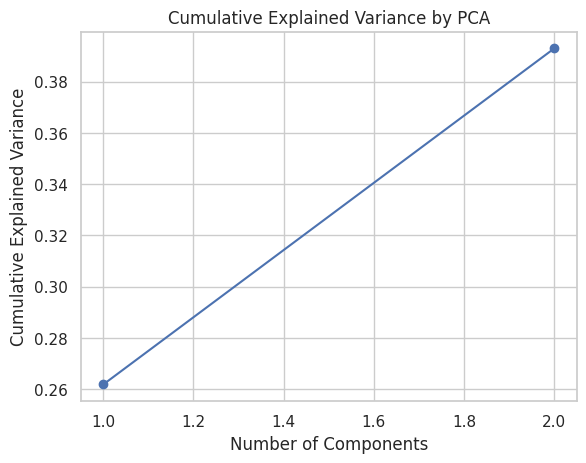

In [22]:
columns = ['ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
           'RestingECG', 'MaxHR', 'Oldpeak', 'ST_Slope']

# Create box plots for each column
plt.figure(figsize=(16, 12))
num_cols = len(columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # Adjust number of rows based on columns
for i, col in enumerate(columns, 1):
    plt.subplot(rows, 3, i)  # Arrange in a grid of dynamic rows and 3 columns
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
plt.show()

# Function to identify outliers based on IQR
def identify_outliers(df, columns):
    outliers = {}
    for col in columns:
        if df[col].dtype in ['float64', 'int64']:  # Ensure the column is numeric
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Identify outliers for each feature
outliers = identify_outliers(df, columns)

# Print the outliers for each column
for col, outlier_data in outliers.items():
    print(f"Outliers in {col}:")
    print(outlier_data[[col]])  # Print only the outlier values for the column
    print("\n")

# Check for null values
print(df.isnull().sum())

# Print data types of columns
print(df.dtypes)

# Dataset information and summary statistics
df.info()
print(df.describe())

# Encode categorical features to numeric
df.Sex.replace({'F': 0, 'M': 1}, inplace=True)
df.ChestPainType.replace({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3}, inplace=True)
df.RestingECG.replace({'Normal': 0, 'ST': 1, 'LVH': 2}, inplace=True)
df.ExerciseAngina.replace({'N': 0, 'Y': 1}, inplace=True)
df.ST_Slope.replace({'Up': 0, 'Flat': 1, 'Down': 2}, inplace=True)

# Display the first 10 rows of the dataset
print(df.head(10))

# Separate the target variable from the features
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with 2 components for dimensionality reduction
pca = PCA(n_components=2)

# Fit and transform the scaled data
X_pca = pca.fit_transform(X_scaled)

# Display explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Convert PCA result to DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['HeartDisease'] = y  # Add target variable for visualization

# Plot the 2D PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='HeartDisease', data=pca_df, palette='coolwarm', alpha=0.7)
plt.title('2D PCA of Heart Disease Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Heart Disease', loc='best')
plt.show()

# Plot cumulative explained variance
explained_variance_cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance_cumsum) + 1), explained_variance_cumsum, marker='o')
plt.title('Cumulative Explained Variance by PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


Subset of data for people aged 60 and 51 after replacing outliers:
     Age  MaxHR
18    60    125
29    51    145
55    51    170
101   51    100
181   51    150
..   ...    ...
860   60    144
863   60    155
864   60    142
868   51    123
876   60    132

[67 rows x 2 columns]


<ipython-input-23-c1f35eb60149>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='MaxHR', data=df_subset, palette='coolwarm')


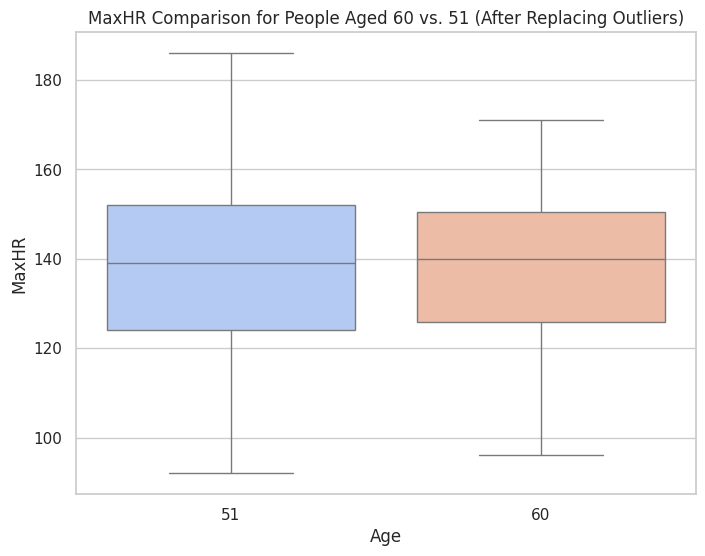

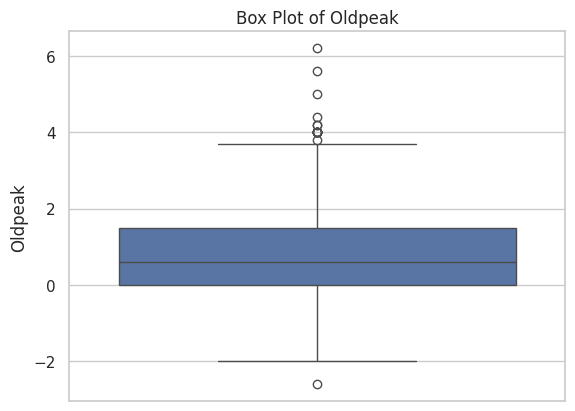

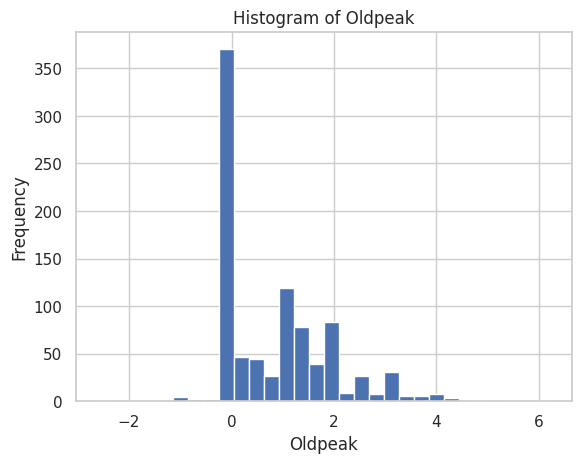

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []
     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
320   59    1              1        125            0          1           0   
321   63    1              2        100            0          1           0   
322   38    0              2        105            0          1           0   
323   62    1              2        115            0          1           0   
325   42    1              2        105            0          1           0   
326   45    1              1        110            0          0           0   
327   59    1              2        125            0          1           0   
328   52    1              2         95            0          1           0   
329   60    1              2        130            0          1           1   
330   60    1              1        115       

<ipython-input-23-c1f35eb60149>:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cholesterol'] = df['Cholesterol'].replace(0, median_cholesterol)


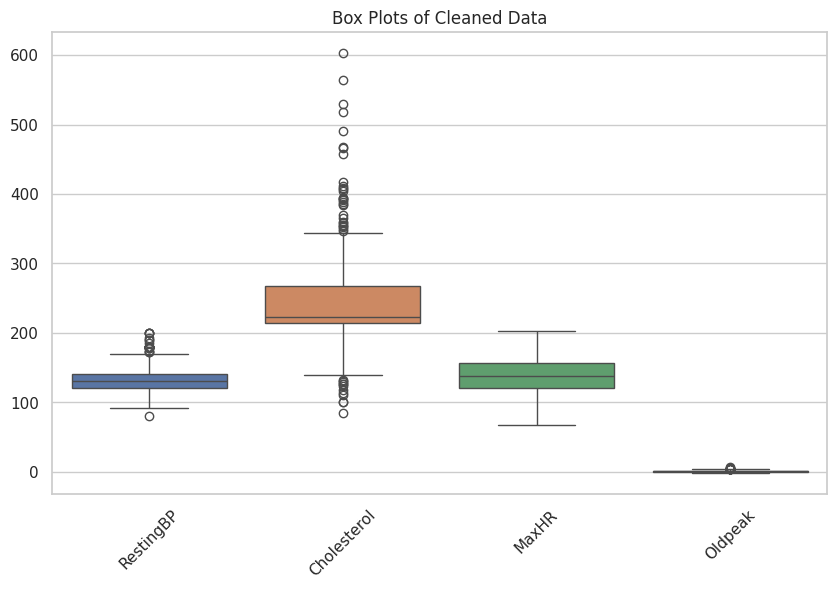

In [23]:
# Filter people aged 60 and 51
age_60 = df[df['Age'] == 60]  # Extract people aged 60
age_51 = df[df['Age'] == 51]  # Extract people aged 51

# Calculate the median MaxHR for each age group
median_maxhr_60 = age_60['MaxHR'].median()
median_maxhr_51 = age_51['MaxHR'].median()


# Define a function to replace outliers in MaxHR with the calculated median
def replace_outliers_with_median_for_age_group(df, age_group, median_maxhr):
    # Filter the data for the specific age group
    age_group_data = df[df['Age'] == age_group]

    # Calculate the IQR for MaxHR within this age group
    Q1 = age_group_data['MaxHR'].quantile(0.25)
    Q3 = age_group_data['MaxHR'].quantile(0.75)
    IQR = Q3 - Q1

    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers within the age group
    outliers = age_group_data[(age_group_data['MaxHR'] < lower_bound) | (age_group_data['MaxHR'] > upper_bound)]

    # Replace the outliers with the median MaxHR of that age group
    df.loc[outliers.index, 'MaxHR'] = median_maxhr

    return df

# Replace outliers for age 60 with the median for age 60
df = replace_outliers_with_median_for_age_group(df, 60, median_maxhr_60)

# Replace outliers for age 51 with the median for age 51
df = replace_outliers_with_median_for_age_group(df, 51, median_maxhr_51)

# Verify changes by checking a subset of the data
df_subset = df[df['Age'].isin([60, 51])]  # Check people aged 60 and 51
print("\nSubset of data for people aged 60 and 51 after replacing outliers:")
print(df_subset[['Age', 'MaxHR']])


# Create a boxplot to visualize MaxHR for the two age groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', y='MaxHR', data=df_subset, palette='coolwarm')
plt.title('MaxHR Comparison for People Aged 60 vs. 51 (After Replacing Outliers)')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.show()


# # Concatenate the two subsets to compare them
# age_comparison = pd.concat([age_60[['Age', 'MaxHR']], age_51[['Age', 'MaxHR']]])

# # Print the data to verify
# print(age_comparison)

# # Visualize the comparison using a box plot
# plt.figure(figsize=(8, 6))
# sns.boxplot(x='Age', y='MaxHR', data=age_comparison, palette='coolwarm')
# plt.title('Comparison of MaxHR for People Aged 60 vs. 51')
# plt.xlabel('Age')
# plt.ylabel('MaxHR')
# plt.show()



# # Calculate the median MaxHR
# median_maxhr = df['MaxHR'].median()

# # Replace the anomalous values with the median
# df['MaxHR'] = df['MaxHR'].replace([63, 60], median_maxhr)

# df_subset = df.iloc[370:394]  # Remember, the ending index in iloc is exclusive, so use 394
# print(df_subset)


# # Create a boxplot of 'MaxHR' to visualize its distribution
# sns.boxplot(data=df['MaxHR'])  # Use the cleaned or filtered dataframe if necessary
# plt.title('Box Plot of MaxHR')
# plt.xlabel('MaxHR')
# plt.show()

#------------------------------------------------------------------------------------------------
# Boxplot to visualize distribution of Oldpeak values
sns.boxplot(data=df['Oldpeak'])
plt.title('Box Plot of Oldpeak')
plt.show()

# Histogram to see distribution
plt.hist(df['Oldpeak'], bins=30)
plt.title('Histogram of Oldpeak')
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.show()


df = df[df['Oldpeak'] != -2.6]

# Check if the outlier is removed
print(df[df['Oldpeak'] == -2.6])

df_subset = df.iloc[320:330]
print(df_subset)

# #-------------------------------------------------------------------------------------------------

# Calculate the median of the Cholesterol column
median_cholesterol = df['Cholesterol'].median()

# Replace 0 values in the Cholesterol column with the calculated median
df['Cholesterol'] = df['Cholesterol'].replace(0, median_cholesterol)

# Verify that 0 values have been replaced
print(df[df['Cholesterol'] == 0])  # This should return an empty DataFrame

df_subset = df.iloc[394:409]  # Remember, the ending index in iloc is exclusive, so use 394
print(df_subset)

# #----------------------------------------------------------------------------------------------------

# Remove rows where RestingBP is 0
df = df[df['RestingBP'] != 0]

# Verify that no rows with RestingBP = 0 are left
print(df[df['RestingBP'] == 0])  # This should return an empty DataFrame

# #------------------------------------------------------------------------------------------------------

# Set the style of the plots
sns.set(style="whitegrid")

# List of numerical columns for box plots (customize as needed)
numerical_columns = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']  # Replace with your actual column names

# Create a boxplot for each numerical feature in the dataset
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Box Plots of Cleaned Data')
plt.xticks(rotation=45)
plt.show()

# #-----------------------------------------------------------------------------------------------------------




In [24]:
df.to_csv('updated_heart_disease_dataset.csv', index=False)


In [25]:
updated_df = pd.read_csv('updated_heart_disease_dataset.csv')
print(updated_df.head())

files.download('updated_heart_disease_dataset.csv')

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              0        140          289          0           0   
1   49    0              1        160          180          0           0   
2   37    1              0        130          283          0           1   
3   48    0              2        138          214          0           0   
4   54    1              1        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         0             0  
1    156               0      1.0         1             1  
2     98               0      0.0         0             0  
3    108               1      1.5         1             1  
4    122               0      0.0         0             0  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-26-346faec57e27>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_updated.Sex.replace({'F': 0, 'M': 1}, inplace=True)
<ipython-input-26-346faec57e27>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

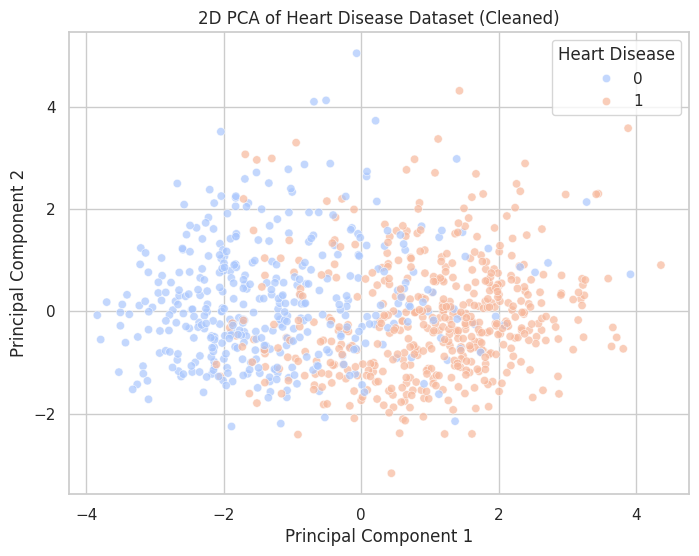

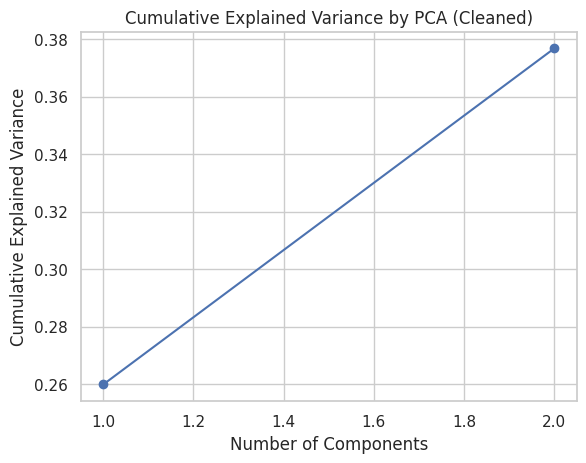

In [26]:
df_updated = pd.read_csv('updated_heart_disease_dataset.csv')


# Encode categorical features to numeric
df_updated.Sex.replace({'F': 0, 'M': 1}, inplace=True)
df_updated.ChestPainType.replace({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3}, inplace=True)
df_updated.RestingECG.replace({'Normal': 0, 'ST': 1, 'LVH': 2}, inplace=True)
df_updated.ExerciseAngina.replace({'N': 0, 'Y': 1}, inplace=True)
df_updated.ST_Slope.replace({'Up': 0, 'Flat': 1, 'Down': 2}, inplace=True)

# Separate the target variable from the features
X_cleaned = df_updated.drop(columns=['HeartDisease'])
y_cleaned = df_updated['HeartDisease']

# Standardize the feature data
X_scaled_cleaned = scaler.fit_transform(X_cleaned)

# Perform PCA with 2 components for dimensionality reduction
X_pca_cleaned = pca.fit_transform(X_scaled_cleaned)

# Convert PCA result to DataFrame
pca_df_cleaned = pd.DataFrame(X_pca_cleaned, columns=['PC1', 'PC2'])
pca_df_cleaned['HeartDisease'] = y_cleaned  # Add target variable for visualization

# Plot the 2D PCA for the cleaned dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='HeartDisease', data=pca_df_cleaned, palette='coolwarm', alpha=0.7)
plt.title('2D PCA of Heart Disease Dataset (Cleaned)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Heart Disease', loc='best')
plt.show()

# Plot cumulative explained variance for the cleaned dataset
explained_variance_cumsum_cleaned = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance_cumsum_cleaned) + 1), explained_variance_cumsum_cleaned, marker='o')
plt.title('Cumulative Explained Variance by PCA (Cleaned)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [36]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 1. Separate features (X) and target (y)
# X_cleaned = df_updated.drop(columns=['HeartDisease'])
# y_cleaned = df_updated['HeartDisease']

# # 2. Split data into 80% training and 20% remaining
# X_train, X_temp, y_train, y_temp = train_test_split(
#     X_cleaned, y_cleaned, test_size=0.2, random_state=42, stratify=y_cleaned
# )

# # 3. Split remaining data into 10% testing and 10% validation
# X_test, X_val, y_test, y_val = train_test_split(
#     X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
# )

# # 4. Standardize the features
# scaler = StandardScaler()

# # Standardize training data
# X_train_scaled = scaler.fit_transform(X_train)

# # Standardize testing and validation data
# X_test_scaled = scaler.transform(X_test)
# X_val_scaled = scaler.transform(X_val)

# # Verify splits
# print(f"Training set size: {len(X_train)}")
# print(f"Testing set size: {len(X_test)}")
# print(f"Validation set size: {len(X_val)}")

# # 5. Train and Test Naïve Bayes
# nb_classifier = GaussianNB()
# nb_classifier.fit(X_train_scaled, y_train)  # Train the Naïve Bayes classifier

# # Predict on test data
# y_pred_nb = nb_classifier.predict(X_test_scaled)

# # Evaluate Naïve Bayes
# nb_precision = precision_score(y_test, y_pred_nb)
# nb_recall = recall_score(y_test, y_pred_nb)
# nb_f1 = f1_score(y_test, y_pred_nb)

# # 6. Train and Test SVM
# svm_classifier = SVC(kernel='linear')
# svm_classifier.fit(X_train_scaled, y_train)  # Train the SVM classifier

# # Predict on test data
# y_pred_svm = svm_classifier.predict(X_test_scaled)

# # Evaluate SVM
# svm_precision = precision_score(y_test, y_pred_svm)
# svm_recall = recall_score(y_test, y_pred_svm)
# svm_f1 = f1_score(y_test, y_pred_svm)

# # 7. Plotting Bar Graphs for Comparison
# # Create lists of metrics and corresponding classifier names
# metrics = ['Precision', 'Recall', 'F1-Score']
# nb_scores = [nb_precision, nb_recall, nb_f1]
# svm_scores = [svm_precision, svm_recall, svm_f1]

# # Create a bar graph for each metric
# x = np.arange(len(metrics))  # The label locations
# width = 0.35  # The width of the bars

# # Plotting the bar graph
# fig, ax = plt.subplots(figsize=(8, 6))

# rects1 = ax.bar(x - width/2, nb_scores, width, label='Naïve Bayes')
# rects2 = ax.bar(x + width/2, svm_scores, width, label='SVM')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Comparison of Precision, Recall, and F1-Score for Naïve Bayes and SVM')
# ax.set_xticks(x)
# ax.set_xticklabels(metrics)
# ax.legend()

# # Function to add value labels on top of the bars
# def add_labels(rects):
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate(f'{height:.2f}',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# # Add labels to each bar
# add_labels(rects1)
# add_labels(rects2)

# # Show the plot
# plt.tight_layout()
# plt.show()


Training set size: 732
Testing set size: 92
Validation set size: 92


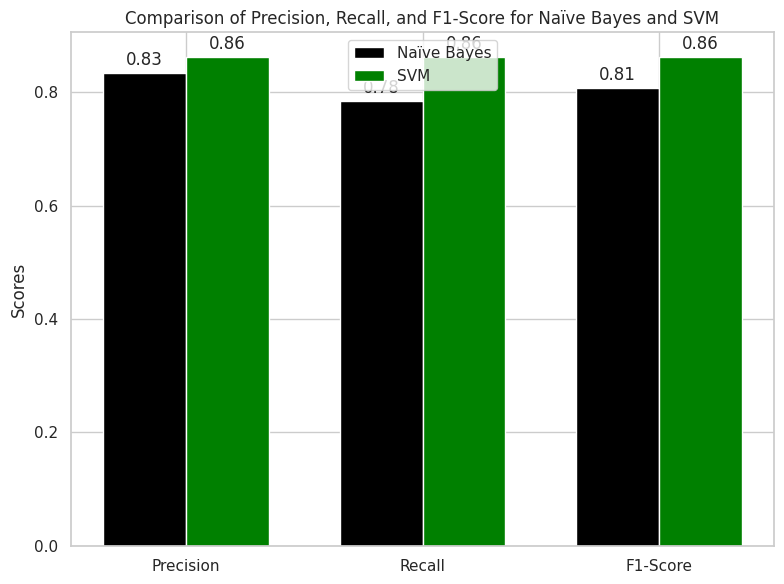

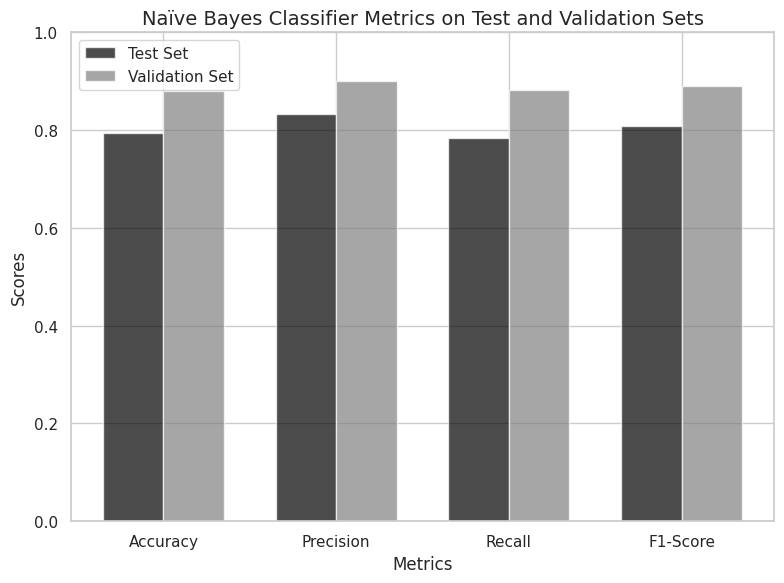

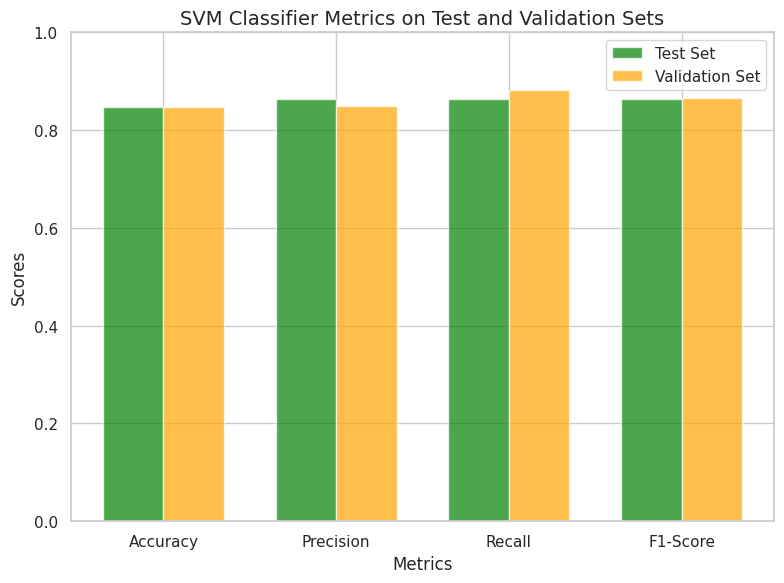

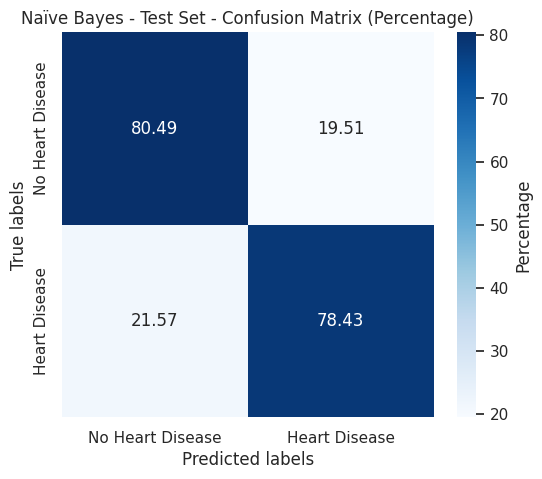

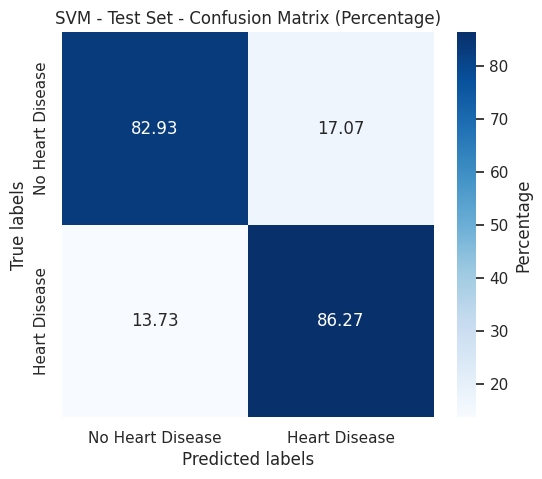

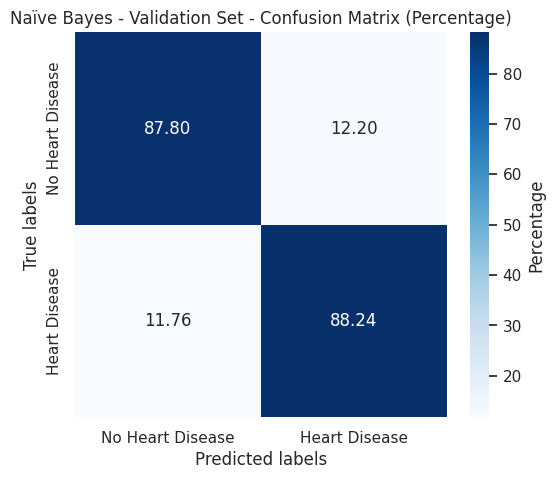

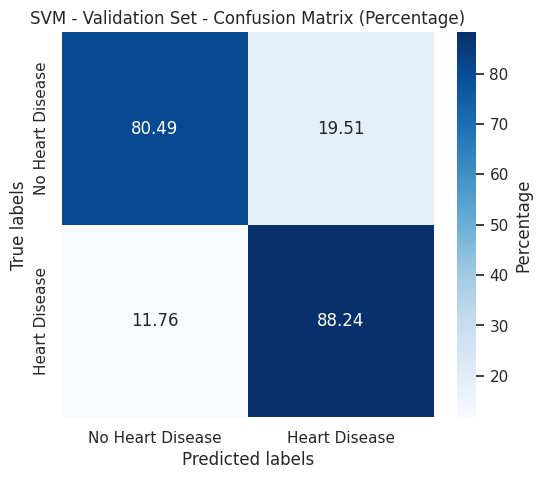

In [53]:


# 1. Separate features (X) and target (y)
X_features = df_updated.drop(columns=['HeartDisease'])
y_target = df_updated['HeartDisease']

# 2. Split data into 80% training and 20% remaining
X_train, X_temp, y_train, y_temp = train_test_split(
    X_features, y_target, test_size=0.2, random_state=42, stratify=y_target
)

# 3. Split remaining data into 10% testing and 10% validation
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# 4. Standardize the features
scaler = StandardScaler()

# Standardize training data
X_train_scaled = scaler.fit_transform(X_train)

# Standardize testing and validation data
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Verify splits
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print(f"Validation set size: {len(X_val)}")

# 5. Train and Evaluate Naïve Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_nb = nb_classifier.predict(X_test_scaled)

# Calculate metrics for Naïve Bayes
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)

# 6. Train and Evaluate SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Calculate metrics for SVM
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# 7. Prepare Data for Plotting
metrics = ['Precision', 'Recall', 'F1-Score']
nb_scores = [nb_precision, nb_recall, nb_f1]
svm_scores = [svm_precision, svm_recall, svm_f1]

# Set bar width and position for the bars
bar_width = 0.35
x = np.arange(len(metrics))  # The label locations

# Plotting the comparison bar graph
fig, ax = plt.subplots(figsize=(8, 6))

# Create bars for Naïve Bayes and SVM scores
rects1 = ax.bar(x - bar_width / 2, nb_scores, bar_width, label='Naïve Bayes', color='black')
rects2 = ax.bar(x + bar_width / 2, svm_scores, bar_width, label='SVM', color='green')

# Labeling the graph
ax.set_ylabel('Scores')
ax.set_title('Comparison of Precision, Recall, and F1-Score for Naïve Bayes and SVM')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to add labels above the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add value labels on top of each bar
add_labels(rects1)
add_labels(rects2)

# Show the plot
plt.tight_layout()
plt.show()

# 8. Plotting for Naïve Bayes on Test and Validation Sets
metrics_all = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
nb_metrics_test = [
    accuracy_score(y_test, y_pred_nb),
    nb_precision,
    nb_recall,
    nb_f1
]

svm_metrics_test = [
    accuracy_score(y_test, y_pred_svm),
    svm_precision,
    svm_recall,
    svm_f1
]

# Predicting for Validation Set for both classifiers
y_val_pred_nb = nb_classifier.predict(X_val_scaled)
y_val_pred_svm = svm_classifier.predict(X_val_scaled)

nb_metrics_val = [
    accuracy_score(y_val, y_val_pred_nb),
    precision_score(y_val, y_val_pred_nb),
    recall_score(y_val, y_val_pred_nb),
    f1_score(y_val, y_val_pred_nb)
]

svm_metrics_val = [
    accuracy_score(y_val, y_val_pred_svm),
    precision_score(y_val, y_val_pred_svm),
    recall_score(y_val, y_val_pred_svm),
    f1_score(y_val, y_val_pred_svm)
]

# Bar width and positions for plotting
bar_width = 0.35
indices = np.arange(len(metrics_all))

# Naïve Bayes Plotting
plt.figure(figsize=(8, 6))

# Create bars for Naïve Bayes metrics for both Test and Validation sets
plt.bar(indices - bar_width / 2, nb_metrics_test, width=bar_width, label='Test Set', color='black', alpha=0.7)
plt.bar(indices + bar_width / 2, nb_metrics_val, width=bar_width, label='Validation Set', color='gray', alpha=0.7)

# Add labels and title for Naïve Bayes
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Naïve Bayes Classifier Metrics on Test and Validation Sets', fontsize=14)
plt.xticks(indices, metrics_all)
plt.ylim(0, 1)  # Metrics range from 0 to 1
plt.legend()

# Show the plot for Naïve Bayes
plt.tight_layout()
plt.show()

# SVM Plotting
plt.figure(figsize=(8, 6))

# Create bars for SVM metrics for both Test and Validation sets
plt.bar(indices - bar_width / 2, svm_metrics_test, width=bar_width, label='Test Set', color='green', alpha=0.7)
plt.bar(indices + bar_width / 2, svm_metrics_val, width=bar_width, label='Validation Set', color='orange', alpha=0.7)

# Add labels and title for SVM
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('SVM Classifier Metrics on Test and Validation Sets', fontsize=14)
plt.xticks(indices, metrics_all)
plt.ylim(0, 1)  # Metrics range from 0 to 1
plt.legend()

# Show the plot for SVM
plt.tight_layout()
plt.show()


# Function to plot confusion matrix as percentages
def plot_confusion_matrix(y_true, y_pred, title, cmap="Blues"):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Normalize the matrix by row (true class) to get percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap=cmap, xticklabels=['No Heart Disease', 'Heart Disease'],
                yticklabels=['No Heart Disease', 'Heart Disease'], cbar_kws={'label': 'Percentage'})

    plt.title(f'{title} - Confusion Matrix (Percentage)')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Naïve Bayes Confusion Matrix on Test Set
plot_confusion_matrix(y_test, y_pred_nb, "Naïve Bayes - Test Set")

# SVM Confusion Matrix on Test Set
plot_confusion_matrix(y_test, y_pred_svm, "SVM - Test Set")

# Naïve Bayes Confusion Matrix on Validation Set
y_val_pred_nb = nb_classifier.predict(X_val_scaled)
plot_confusion_matrix(y_val, y_val_pred_nb, "Naïve Bayes - Validation Set")

# SVM Confusion Matrix on Validation Set
y_val_pred_svm = svm_classifier.predict(X_val_scaled)
plot_confusion_matrix(y_val, y_val_pred_svm, "SVM - Validation Set")


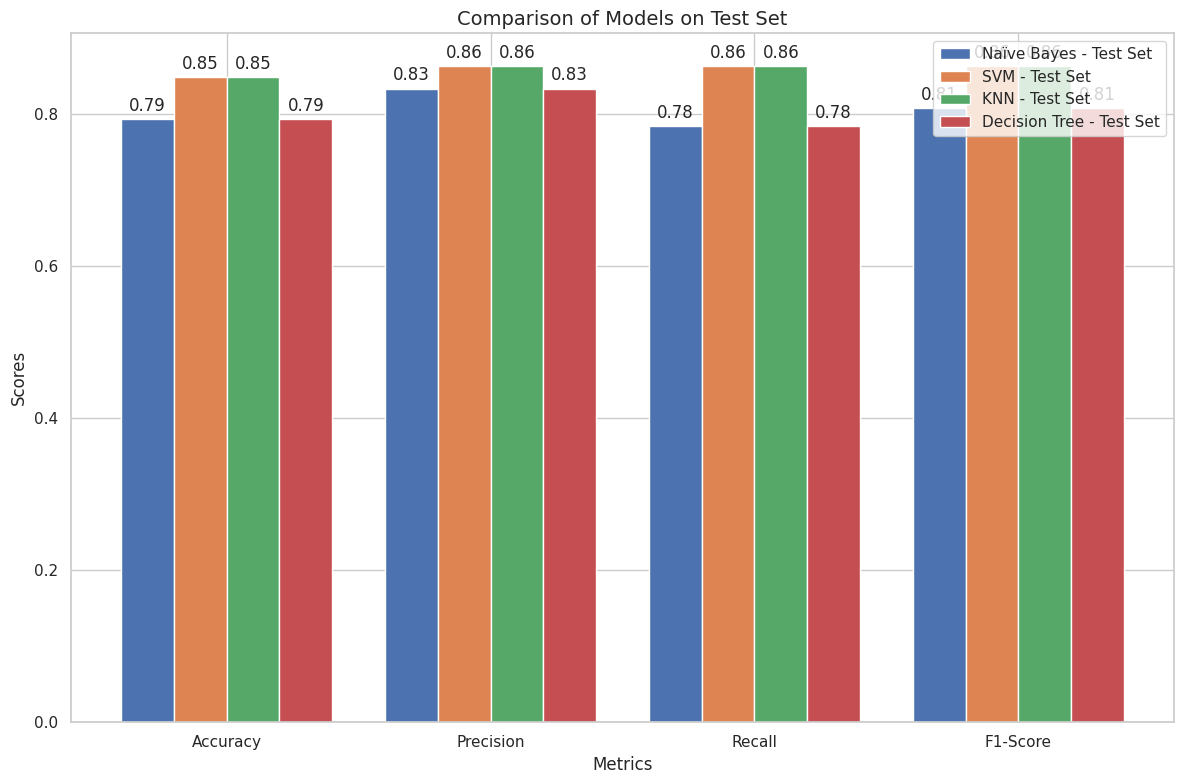

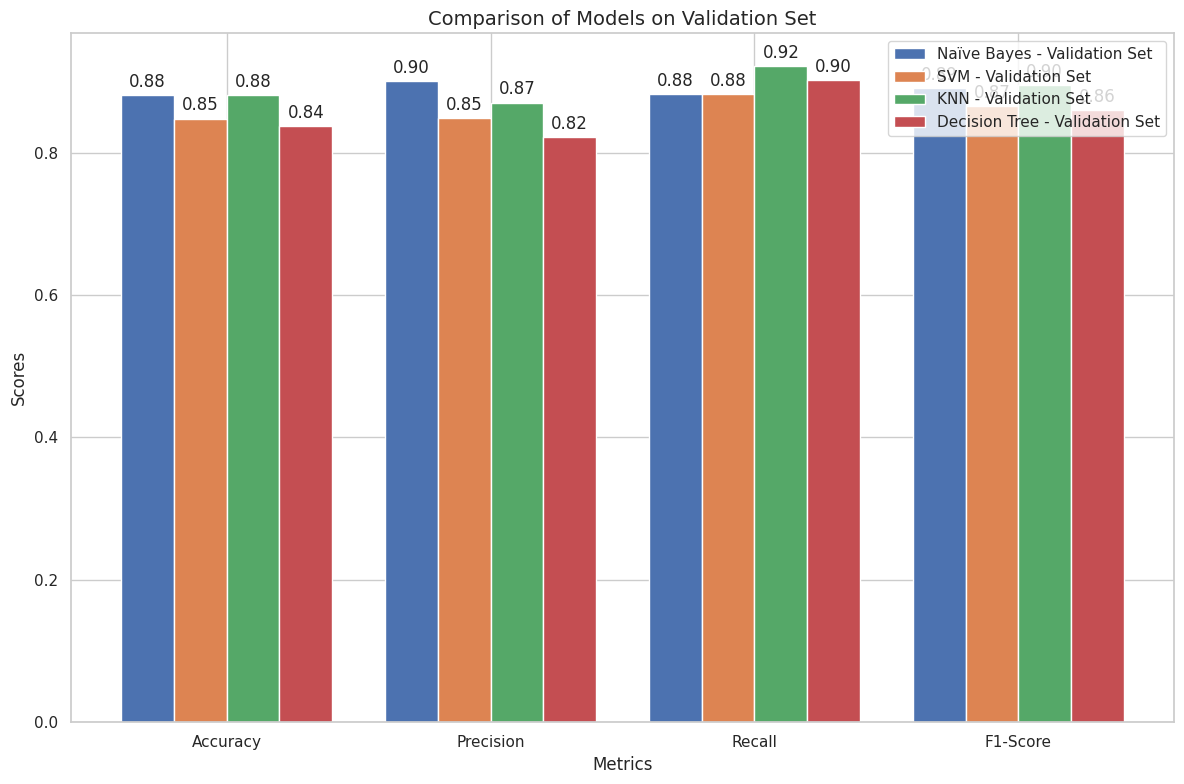

In [55]:
# 5. Train and Evaluate Naïve Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)

# Predict on test and validation data
y_pred_nb = nb_classifier.predict(X_test_scaled)
y_pred_nb_val = nb_classifier.predict(X_val_scaled)

# Calculate metrics for Naïve Bayes
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)

# Calculate validation metrics for Naïve Bayes
nb_metrics_val = [
    accuracy_score(y_val, y_pred_nb_val),
    precision_score(y_val, y_pred_nb_val),
    recall_score(y_val, y_pred_nb_val),
    f1_score(y_val, y_pred_nb_val)
]

# 6. Train and Evaluate SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)

# Predict on test and validation data
y_pred_svm = svm_classifier.predict(X_test_scaled)
y_pred_svm_val = svm_classifier.predict(X_val_scaled)

# Calculate metrics for SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# Calculate validation metrics for SVM
svm_metrics_val = [
    accuracy_score(y_val, y_pred_svm_val),
    precision_score(y_val, y_pred_svm_val),
    recall_score(y_val, y_pred_svm_val),
    f1_score(y_val, y_pred_svm_val)
]

# 7. Train and Evaluate KNN
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)

# Predict on test and validation data
y_pred_knn = knn_classifier.predict(X_test_scaled)
y_pred_knn_val = knn_classifier.predict(X_val_scaled)

# Calculate metrics for KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

# Calculate validation metrics for KNN
knn_metrics_val = [
    accuracy_score(y_val, y_pred_knn_val),
    precision_score(y_val, y_pred_knn_val),
    recall_score(y_val, y_pred_knn_val),
    f1_score(y_val, y_pred_knn_val)
]

# 8. Train and Evaluate Decision Trees
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

# Predict on test and validation data
y_pred_dt = dt_classifier.predict(X_test_scaled)
y_pred_dt_val = dt_classifier.predict(X_val_scaled)

# Calculate metrics for Decision Trees
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

# Calculate validation metrics for Decision Trees
dt_metrics_val = [
    accuracy_score(y_val, y_pred_dt_val),
    precision_score(y_val, y_pred_dt_val),
    recall_score(y_val, y_pred_dt_val),
    f1_score(y_val, y_pred_dt_val)
]

# Prepare Data for Combined Plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
models = ['Naïve Bayes', 'SVM', 'KNN', 'Decision Tree']

# Collect results for each classifier for the test set
test_scores = {
    'Naïve Bayes': [nb_accuracy, nb_precision, nb_recall, nb_f1],
    'SVM': [svm_accuracy, svm_precision, svm_recall, svm_f1],
    'KNN': [knn_accuracy, knn_precision, knn_recall, knn_f1],
    'Decision Tree': [dt_accuracy, dt_precision, dt_recall, dt_f1]
}

# Collect results for each classifier for the validation set
val_scores = {
    'Naïve Bayes': nb_metrics_val,
    'SVM': svm_metrics_val,
    'KNN': knn_metrics_val,
    'Decision Tree': dt_metrics_val
}

# Set bar width and position for the bars
bar_width = 0.20
x = np.arange(len(metrics))  # The label locations

# Plotting the test set graph
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through the models and plot bars for each
for i, model in enumerate(models):
    ax.bar(x + i * bar_width - 1.5 * bar_width, test_scores[model], bar_width, label=f'{model} - Test Set')

# Add labels and title for the test set
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of Models on Test Set', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to add labels above the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add value labels on top of each bar for the test graph
for rects in ax.patches:
    add_labels([rects])

# Show the test plot
plt.tight_layout()
plt.show()

# Plotting the validation set graph
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through the models and plot bars for each
for i, model in enumerate(models):
    ax.bar(x + i * bar_width - 1.5 * bar_width, val_scores[model], bar_width, label=f'{model} - Validation Set')

# Add labels and title for the validation set
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of Models on Validation Set', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels on top of each bar for the validation graph
for rects in ax.patches:
    add_labels([rects])

# Show the validation plot
plt.tight_layout()
plt.show()
